In [1]:
import numpy as np
import scipy.fftpack
from scipy import ndimage
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
import os

In [2]:
data=pd.read_table('datos.txt')
data_2=(data.round(2)).pivot(index='Y', columns='X', values='RV')

nom_reg = '604'
nom_lin = 'Halpha'
pc=4.16

In [3]:
data.describe()

,X,Y,RV
count,330.000000,330.000000,330.000000
mean,107.280000,9.390000,-275.757688
std,12.788265,6.260324,9.697986
min,85.824000,0.000000,-296.649181
25%,96.552000,4.000000,-282.613847
50%,107.280000,9.000000,-276.070115
75%,118.008000,15.000000,-270.394313
max,128.736000,19.600000,-231.143341


Fourier Transform 2D

In [4]:
#Return multidimensional discrete Fourier transform.
FT2a=scipy.fftpack.fft2(data_2)
#Shift the zero-frequency component to the center of the spectrum.
FT2 = scipy.fftpack.fftshift(FT2a)
power_s = np.abs(FT2)

PSD1D
https://medium.com/tangibit-studios/2d-spectrum-characterization-e288f255cc59


In [15]:
h  = power_s.shape[0]
w  = power_s.shape[1]
wc = w//2
hc = h//2

# create an array of integer radial distances from the center
Y, X = np.ogrid[0:h, 0:w]
r    = np.hypot(X - wc, Y - hc).astype(np.int)

# SUM all psd2D pixels with label 'r' for 0<=r<=wc
psd1D_1= ndimage.sum(power_s, r, index=np.arange(0, wc+1))

In [6]:
#out of the black-box method
rdf=pd.DataFrame(r)
psdf=pd.DataFrame(power_s)
data_ps=dict()

In [7]:
for i in range(wc+1):
    m=(rdf==i)
    psm=(psdf[m].fillna(0)).to_numpy()
    s=psm.sum()
    err=psm.std()/np.sqrt(len(psm)-1)
    data_ps[i]=[i,s,err]
    
psd1D_2=pd.DataFrame(data_ps).T

In [8]:
psd1D_2.head()

,0,1,2
0,0.0,91000.010000,1667.263315
1,1.0,3967.530751,28.312414
2,2.0,4825.652144,29.492494
3,3.0,4089.138847,17.519286
4,4.0,4951.656017,20.128097


In [9]:
Err_12=psd1D_1-psd1D_2[1]
print(Err_12)

0     0.000000e+00
1    -4.547474e-13
2     0.000000e+00
3     0.000000e+00
4    -9.094947e-13
5     0.000000e+00
6    -4.547474e-13
7     4.547474e-13
8     0.000000e+00
9     0.000000e+00
10    0.000000e+00
11   -2.273737e-13
12    0.000000e+00
13    0.000000e+00
14    0.000000e+00
15    1.136868e-13
16    2.273737e-13
Name: 1, dtype: float64


(0.0, 33.0, 0.0, 10.0)

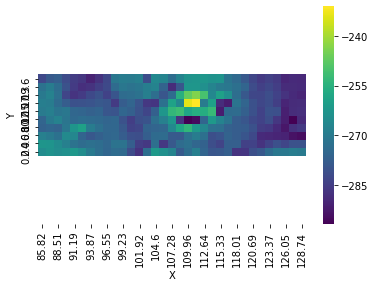

In [10]:
sns.heatmap(data_2, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

(0.0, 33.0, 0.0, 10.0)

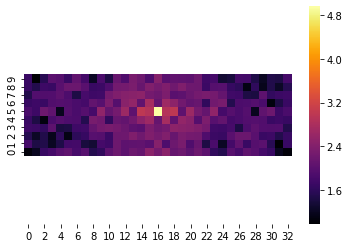

In [11]:
sns.heatmap(np.log10(power_s), cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

(0.0, 33.0, 0.0, 10.0)

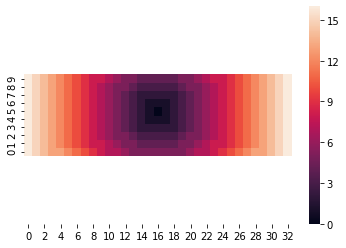

In [12]:
sns.heatmap(rdf)
plt.gca().invert_yaxis()
plt.axis('equal')

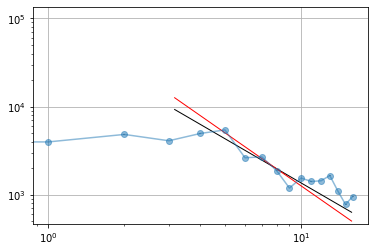

In [13]:
fig, ax=plt.subplots()
sgrid = np.logspace(0.5, 1.2)
plt.plot(sgrid, (10**4.8)*sgrid**(-5/3), color="k", lw=1, label="Kolmogorov")
plt.plot(sgrid, (10**5.1)*sgrid**(-2), color="r", lw=1, label="Burgers")
ax.errorbar(psd1D_2[0],psd1D_2[1],yerr=psd1D_2[2], fmt="o-", ecolor='k', alpha=0.5)
ax.set(xscale='log',yscale='log')
#plt.legend()
#plt.xlim(2, 20)
plt.ylim(psd1D_2[1].min()*0.6, psd1D_2[1].max()*1.5)
ax.grid()
